Data Preparation and Pre-processing

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_lables =[]
train_samples = []

Experimental Data:

An experimental Drug was tested for individuals from 13 to 100 in clinical trial. Trail had 2100 participants where half were under 65years and other half were under 65, or older. Around 95% patients 65 or older experienced side effects. Around 95% patients 65 or older experienced no side effects.

In [ ]:
for i in range(50):
  # ~5% of younger individuals who did experience side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_lables.append(1)

  # ~5% of older individuals who dod not experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_lables.append(0)   # Here 1 represents patients did experience side effects, 0 represents patients did not experience side effects

for i in range(1000):
  # ~95% of younger individuals who did not experience side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_lables.append(0)

  
  # ~95% of older individuals who  experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_lables.append(1)

In [ ]:
for i in train_samples:
  print(i)

In [ ]:
for i in train_lables:
  print(i)

In [ ]:
train_lables = np.array(train_lables)
train_samples = np.array(train_samples)
train_lables, train_samples = shuffle(train_lables, train_samples)

In [ ]:
scalar = MinMaxScaler(feature_range=(0, 1))
scaled_trained_samples = scalar.fit_transform(train_samples.reshape(-1,1))

In [ ]:
for i in scaled_trained_samples:
  print(i)

Sequential Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
model = Sequential([
                    Dense(units = 16, input_shape = (1,), activation='relu'),
                    Dense(units = 32, activation='relu'),
                    Dense(units = 2, activation='softmax')
]) 

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [64]:
model.fit(x=scaled_trained_samples, y=train_lables, validation_split=0.1, batch_size=10, epochs=30, verbose=2, shuffle=True)

Epoch 1/30
189/189 - 0s - loss: 0.6626 - accuracy: 0.5418 - val_loss: 0.6501 - val_accuracy: 0.5667
Epoch 2/30
189/189 - 0s - loss: 0.6369 - accuracy: 0.6148 - val_loss: 0.6242 - val_accuracy: 0.6286
Epoch 3/30
189/189 - 0s - loss: 0.6104 - accuracy: 0.6778 - val_loss: 0.5989 - val_accuracy: 0.6714
Epoch 4/30
189/189 - 0s - loss: 0.5835 - accuracy: 0.7148 - val_loss: 0.5722 - val_accuracy: 0.7095
Epoch 5/30
189/189 - 0s - loss: 0.5525 - accuracy: 0.7630 - val_loss: 0.5396 - val_accuracy: 0.7810
Epoch 6/30
189/189 - 0s - loss: 0.5201 - accuracy: 0.8037 - val_loss: 0.5093 - val_accuracy: 0.7952
Epoch 7/30
189/189 - 0s - loss: 0.4905 - accuracy: 0.8349 - val_loss: 0.4812 - val_accuracy: 0.8048
Epoch 8/30
189/189 - 0s - loss: 0.4621 - accuracy: 0.8508 - val_loss: 0.4538 - val_accuracy: 0.8143
Epoch 9/30
189/189 - 0s - loss: 0.4351 - accuracy: 0.8619 - val_loss: 0.4280 - val_accuracy: 0.8429
Epoch 10/30
189/189 - 0s - loss: 0.4097 - accuracy: 0.8825 - val_loss: 0.4042 - val_accuracy: 0.8762

Process Test Data

In [71]:
test_labels = []
test_samples = []

In [72]:
for i in range(10):
  # 5% of individuals who did experience side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  # 5% of older individuals who did not experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  # 95% of younger individuals who did not receive side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)
 
  # 5% of older individuals who did experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [73]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [77]:
scaled_test_samples = scalar.fit_transform(test_samples.reshape(-1,1))

Predict: Train model on inference that data contained in test 

In [78]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [79]:
for i in predictions:
  print(i) # Here in the output we are getting the probability either patient not experiencing side effect,  patient experiencing side effect.

[0.01659361 0.9834064 ]
[0.14572173 0.8542783 ]
[0.96218854 0.0378115 ]
[0.9541071  0.04589293]
[0.94840026 0.05159971]
[0.333737 0.666263]
[0.74253064 0.2574694 ]
[0.01659361 0.9834064 ]
[0.09053066 0.90946937]
[0.36431658 0.6356834 ]
[0.9656721  0.03432788]
[0.04306289 0.9569371 ]
[0.9064504  0.09354965]
[0.81200993 0.18799008]
[0.9593474  0.04065255]
[0.11528423 0.8847158 ]
[0.5291143  0.47088572]
[0.03029649 0.9697035 ]
[0.04306289 0.9569371 ]
[0.7674229  0.23257701]
[0.04855275 0.95144725]
[0.95167977 0.04832019]
[0.9640501  0.03594984]
[0.46189454 0.5381054 ]
[0.9648157  0.03518431]
[0.03816884 0.9618311 ]
[0.02441735 0.97558266]
[0.9562076  0.04379248]
[0.04306289 0.9569371 ]
[0.1022456 0.8977544]
[0.9649958  0.03500425]
[0.8317075  0.16829255]
[0.94441175 0.05558829]
[0.05489957 0.94510037]
[0.01150805 0.988492  ]
[0.01382209 0.9861779 ]
[0.92538863 0.07461137]
[0.27675048 0.7232495 ]
[0.3044947 0.6955053]
[0.9648157  0.03518431]
[0.1022456 0.8977544]
[0.203494   0.79650605]
[0

In [80]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [81]:
for i in rounded_predictions:
  print(i)

1
1
0
0
0
1
0
1
1
1
0
1
0
0
0
1
0
1
1
0
1
0
0
1
0
1
1
0
1
1
0
0
0
1
1
1
0
1
1
0
1
1
1
0
1
0
1
0
0
0
1
1
0
1
0
0
0
1
1
0
0
1
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
0
0
1
0
0
0
1
1
1
0
1
1
0
1
0
0
0
1
1
1
0
0
1
1
0
0
0
1
0
0
0
1
1
1
0
0
1
1
0
1
0
0
0
0
1
1
0
0
0
1
1
0
0
0
0
1
1
1
0
1
0
1
0
1
0
1
1
0
0
1
0
0
1
0
1
1
0
0
1
1
1
1
0
0
1
0
1
1
1
0
0
1
0
1
0
0
1
1
1
0
1
1
0
0
0
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
1
0
1
1
0
1
1
1
0
0
1
0
1
0
1
1
1
0
1
0
1
1
0
0
0
1
1
0
1
0
0
1
0
0
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
0
0
0
1
0
1
1
0
1
0
0
0
1
0
0
0
0
0
1
1
1
0
0
1
1
1
1
0
1
0
1
0
1
1
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
1
1
0
0
1
1
1
0
1
1
1
0
0
1
0
1
1
1
0
0
1
1
0
0
1
1
1
0
0
0
0
1
0
1
0
0
1
0
0
0
1
1
0
0
1
0
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
1
1
1
0
1
0
0
0
1
0
1
0
1
0
1
0
1
0
1
1
0
1
0
0
1
1
1
1


Confusion Matrix

In [82]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [84]:
cm = confusion_matrix(y_true= test_labels, y_pred=rounded_predictions)

In [91]:
def plot_confusion_mtrix (cm, classes,normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm=cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print('Normalized confusion matrix')

  else:
    ('Confusion matrix, without Normalization')

  print(cm)

  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment = 'center',color='white' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
 

[[196  14]
 [ 10 200]]


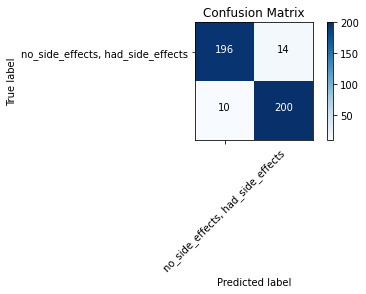

In [92]:
cm_plots_labels=['no_side_effects, had_side_effects']
plot_confusion_mtrix(cm=cm, classes=cm_plots_labels, title='Confusion Matrix')